In [1]:
import eegPinelineDesign
%matplotlib inline
import numpy as np
import random
import mne
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import re
import json
import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA,FastICA
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score
from scipy.fftpack import fft,ifft
import math
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from scipy.signal import spectrogram,find_peaks_cwt,butter, lfilter
from mne.preprocessing.ica import ICA
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.cross_validation import train_test_split,ShuffleSplit
from sklearn.preprocessing import label_binarize,scale
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize,StandardScaler

eegPinelineDesign.change_file_directory('C:/Users/ning/Downloads/training set')
EDFfiles, Annotationfiles = eegPinelineDesign.split_type_of_files()
from eegPinelineDesign import CenterAtPeakOfWindow,Threshold_test,spindle_overlapping_test,used_windows_check,cut_segments

['64chlocs.elp', 'label_extraction.npy', 'label_extraction.pkl', 'pineline 13.csv', 'pipe line 10', 'pipe line 10.csv', 'pipeline 13.pickle', 's5d2_final.edf', 's5d2_final_annotations.txt', 's6n2_final.edf', 's6n2_final_annotations.txt', 'single subject prediction.p', 'single subject.p', 'Sleep Stage Scoring Criteria.docx', 'spindle training.p', 'suj10_d1final.edf', 'suj10_d1final_annotations.txt', 'suj10_d2final.edf', 'suj10_d2final_annotations.txt', 'suj13_l2nap_day2 edited.edf', 'suj13_l2nap_day2 edited1.edf', 'suj13_l2nap_day2 edited1_annotations.txt', 'suj13_l2nap_day2 edited_annotations.txt', 'suj13_l2nap_day2 edited_C3.txt', 'suj13_l2nap_day2 edited_C4.txt', 'suj13_l2nap_day2 edited_F3.txt', 'suj13_l2nap_day2 edited_F4.txt', 'suj13_l2nap_day2 edited_O1.txt', 'suj13_l2nap_day2 edited_O2.txt', 'suj5_d1final.edf', 'suj5_d1final_annotations.txt', 'suj6_d1final.edf', 'suj6_d1final_annotations.txt', 'suj8_d1final.edf', 'suj8_d1final_annotations.txt', 'suj8_d2final.edf', 'suj8_d2final_

In [2]:
import pickle
with open('training data.p','rb') as handle:
    result=pickle.load(handle)

In [3]:
channelList=['F3','F4','C3','C4','O1','O2']
X = [];Y=[]
for num, EDFfileName in enumerate(EDFfiles):
    if EDFfileName == 'suj13_l2nap_day2 edited.edf' or EDFfileName =='suj13_l2nap_day2 edited1.edf':
        pass
    else:
        file_to_read,fileName=eegPinelineDesign.pick_sample_file(EDFfiles,n=num)


        for names in channelList:
            for item in result['spindle'][fileName][names]:
                if item.shape[1] == 3000:

                    X.append(item[0,:])
                    Y.append(1)
            for item in result['non spindle'][fileName][names]:
                if item.shape[1] == 3000:
                    X.append(item[0,:])
                    Y.append(0)

X=np.array(X);Y=np.array(Y)
print(X.shape,Y.shape)

(11110, 3000) (11110,)


In [4]:
idx=np.arange(X.shape[0])
GG=np.random.choice(tuple(idx),len(idx),replace=False)
def shuffle(x):
    return sorted(x, key=lambda k: random.random())
GG = shuffle(shuffle(shuffle(shuffle(GG))))
XX=[];YY=[]
for idxx in GG:
    XX.append(X[idxx])
    YY.append(Y[idxx])
print(YY[:100])

[1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size=0.20)

clf =LogisticRegression(penalty='l2',C=.1,tol=10e-9,fit_intercept=True,solver='liblinear',
                                             max_iter=5e8,multi_class='ovr',n_jobs=-1)



clf.fit(X_train,y_train)
print(classification_report(clf.predict(X_test),y_test))
print(clf.score(X_train,y_train))


             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.51      0.68      2222

avg / total       1.00      0.51      0.68      2222

0.515189018902


In [6]:
pca = PCA(n_components=.99,whiten=True)
X_pca=pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, YY, test_size=0.20)

clf =LogisticRegression(penalty='l2',C=1,tol=10e-9,fit_intercept=True,solver='liblinear',
                                             max_iter=5e8,multi_class='ovr',n_jobs=-1)



clf.fit(X_train,y_train)
print(classification_report(clf.predict(X_test),y_test))
print(clf.score(X_train,y_train))


             precision    recall  f1-score   support

          0       0.02      0.48      0.05        54
          1       0.98      0.51      0.67      2168

avg / total       0.95      0.51      0.65      2222

0.518676867687


In [7]:
from sklearn.preprocessing import normalize
normal_X = normalize(XX)
X_train, X_test, y_train, y_test = train_test_split(normal_X, YY, test_size=0.20)
clf =LogisticRegression(penalty='l2',C=.1,tol=10e-9,fit_intercept=True,solver='liblinear',
                                             max_iter=5e8,multi_class='ovr',n_jobs=-1)
clf.fit(X_train,y_train)
print('logistic,1 fold, 80/20 train/test slipt')
print(classification_report(clf.predict(X_test),y_test))
print('within training data set',clf.score(X_train,y_train))

scores = cross_val_score(clf, normal_X,YY,cv=100)
#print(scores)
print(scores.mean())

from sklearn.cross_validation import cross_val_predict
prediction = cross_val_predict(clf, normal_X,YY,cv=100)
print(accuracy_score(YY,prediction))

logistic,1 fold, 80/20 train/test slipt
             precision    recall  f1-score   support

          0       0.92      0.93      0.92      1055
          1       0.93      0.92      0.93      1167

avg / total       0.92      0.92      0.92      2222

within training data set 0.921917191719
0.921500979876
0.921512151215


0


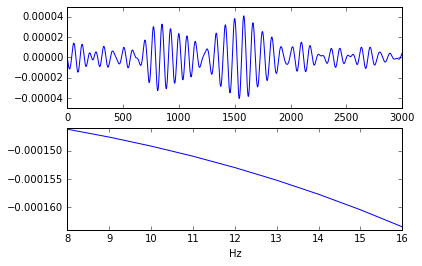

In [54]:
num=np.random.randint(0,len(X))
print(Y[num])
plt.subplot(211)
plt.plot(np.arange(len(XX[num])),XX[num])
plt.subplot(212)
plt.plot(np.arange(8,17),fft(XX[num])[8:17])
plt.xlabel('Hz')

In [27]:
from sklearn.externals import joblib

In [28]:
joblib.dump(clf, 'logistic_model.pkl',compress=9)

['logistic_model.pkl']